R environment

In [1]:
suppressPackageStartupMessages({
    library(reticulate)
    library(ggplot2)
    library(scater)
    library(Seurat)
    library(dplyr)
    library(tidyr)
    library(purrr)
    library(rlog)
    library(tibble)
    library(stringr)
    library(dittoSeq)
    library(patchwork)
    library(HGNChelper)
    library(future)
    plan("multiprocess", workers = 8)
    options(future.globals.maxSize = 1000 * 1024^5)
    options(stringsAsFactors = FALSE)
    set.seed(123)
})

In [2]:
reference <- readRDS('data/core_GBmap.rds')

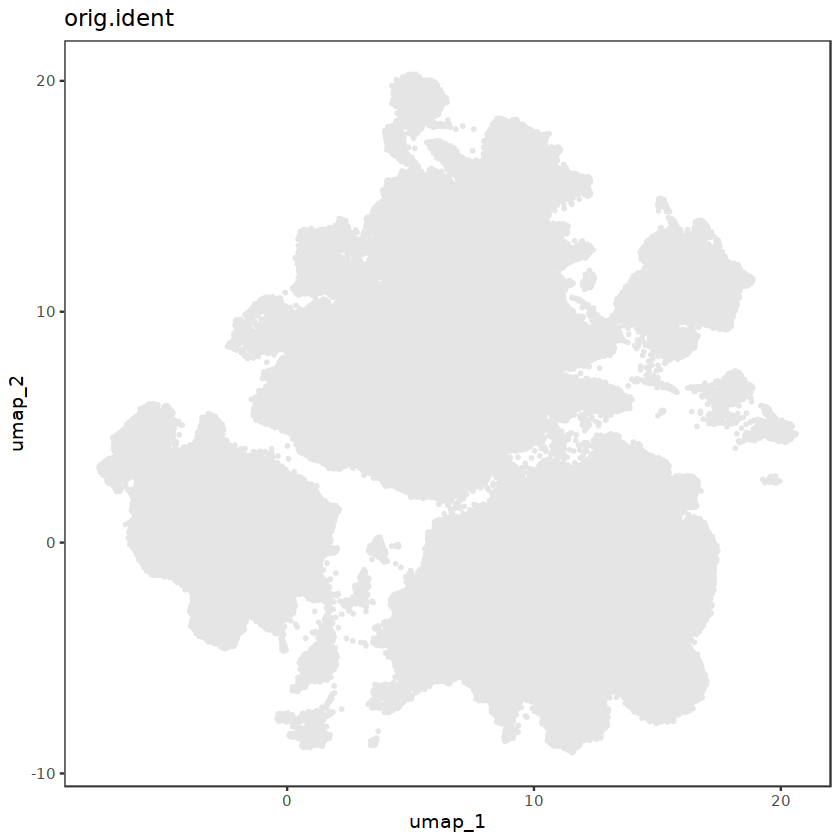

In [16]:
p <- dittoDimPlot(reference, 
             reduction.use = "umap", var = "orig.ident", 
             do.label = F, size = 1,
                 color.panel = 'gray90') + NoLegend() +
            theme(
    panel.background = element_rect(fill = "transparent"), # bg of the panel
    plot.background = element_rect(fill = "transparent", color = NA), # bg of the plot
    panel.grid.major = element_blank(), # get rid of major grid
    panel.grid.minor = element_blank(), # get rid of minor grid
    legend.background = element_rect(fill = "transparent"), # get rid of legend bg
    legend.box.background = element_rect(fill = "transparent") # get rid of legend panel bg
  )
p

In [17]:
ggsave(p, filename = 'figures/core_GBmap__greyBG.png', bg = "transparent")

Saving 6.67 x 6.67 in image



In [ ]:
gbm <- readRDS('data/mapped_Ruiz2021_to_core_GBmap.rds')

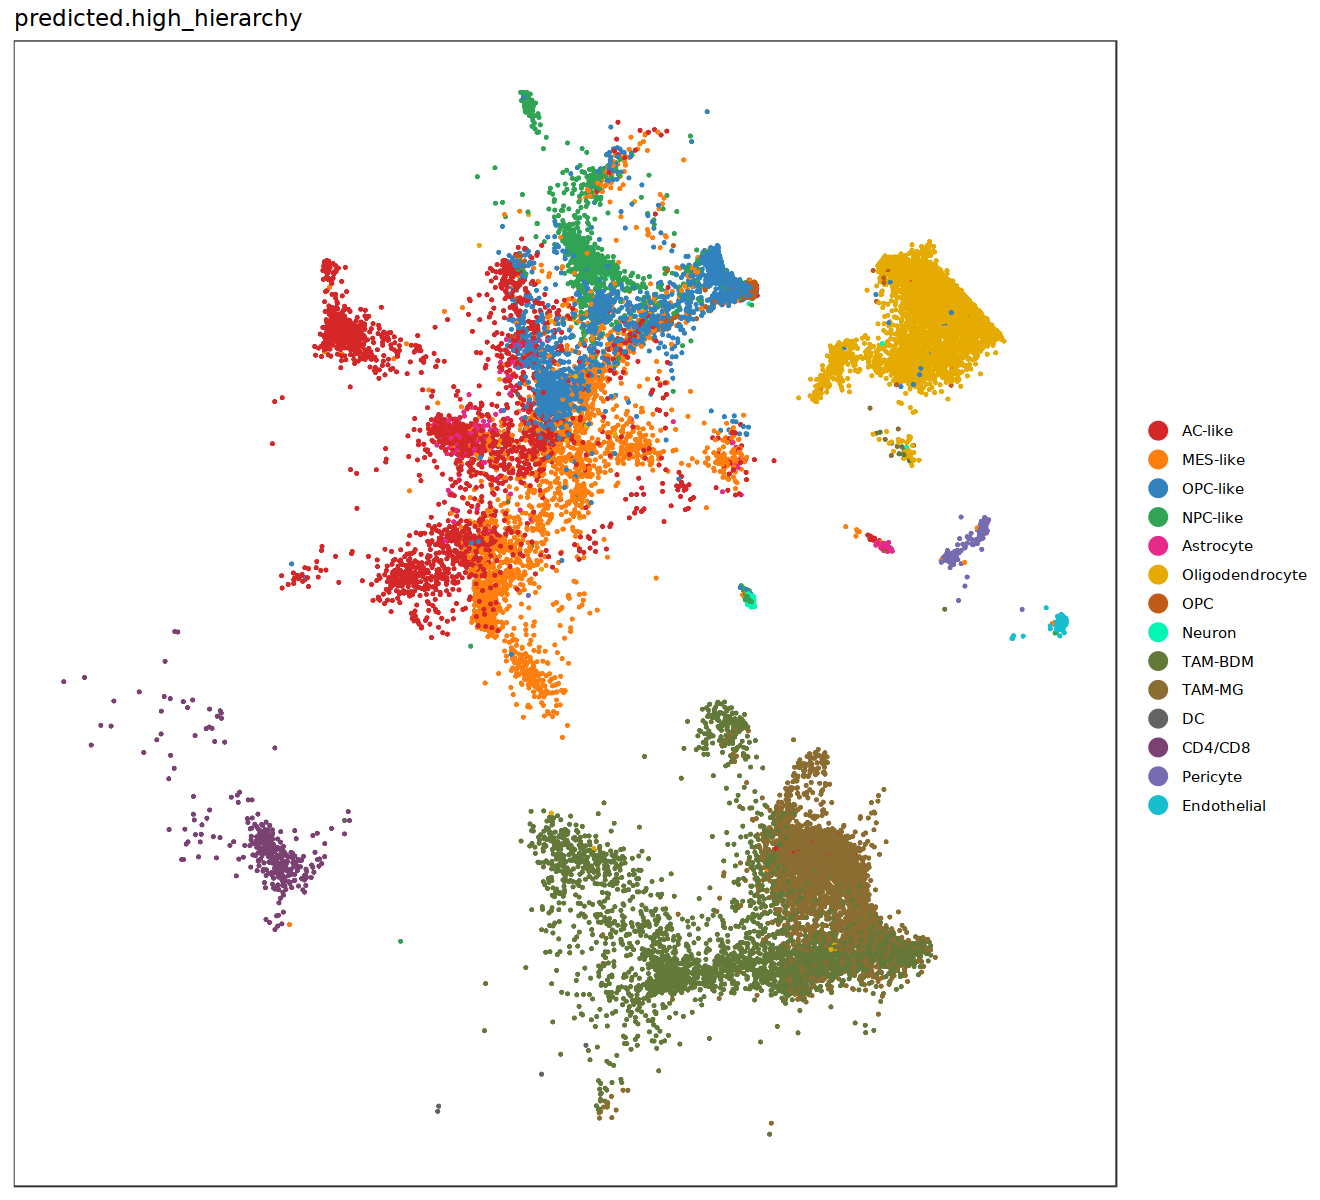

In [ ]:
gbm@meta.data$predicted.high_hierarchy<- factor(x = gbm@meta.data$predicted.high_hierarchy, 
                                   levels = c('AC-like','MES-like','OPC-like','NPC-like',
     'Astrocyte','Oligodendrocyte','OPC','Neuron',
     'TAM-BDM','TAM-MG','DC',
     'CD4/CD8',
     'Pericyte','Endothelial'))

dittoDimPlot(gbm, 
             reduction.use = "ref.umap", var = "predicted.high_hierarchy", 
            do.raster = TRUE,
            color.panel = c('#d62728', '#ff7f0e', '#3182bd','#31a354',
               '#e7298a','#e6ab02', '#bf5b17','#00F6B3',
               '#637939','#8c6d31','#636363',
                '#7b4173',
                '#756bb1','#17becf')) + NoAxes() 

In [ ]:
ggsave('figures/Ruiz2021_mapped_to_core_GBmap.pdf', height = 9,
       width = 10)

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will rep

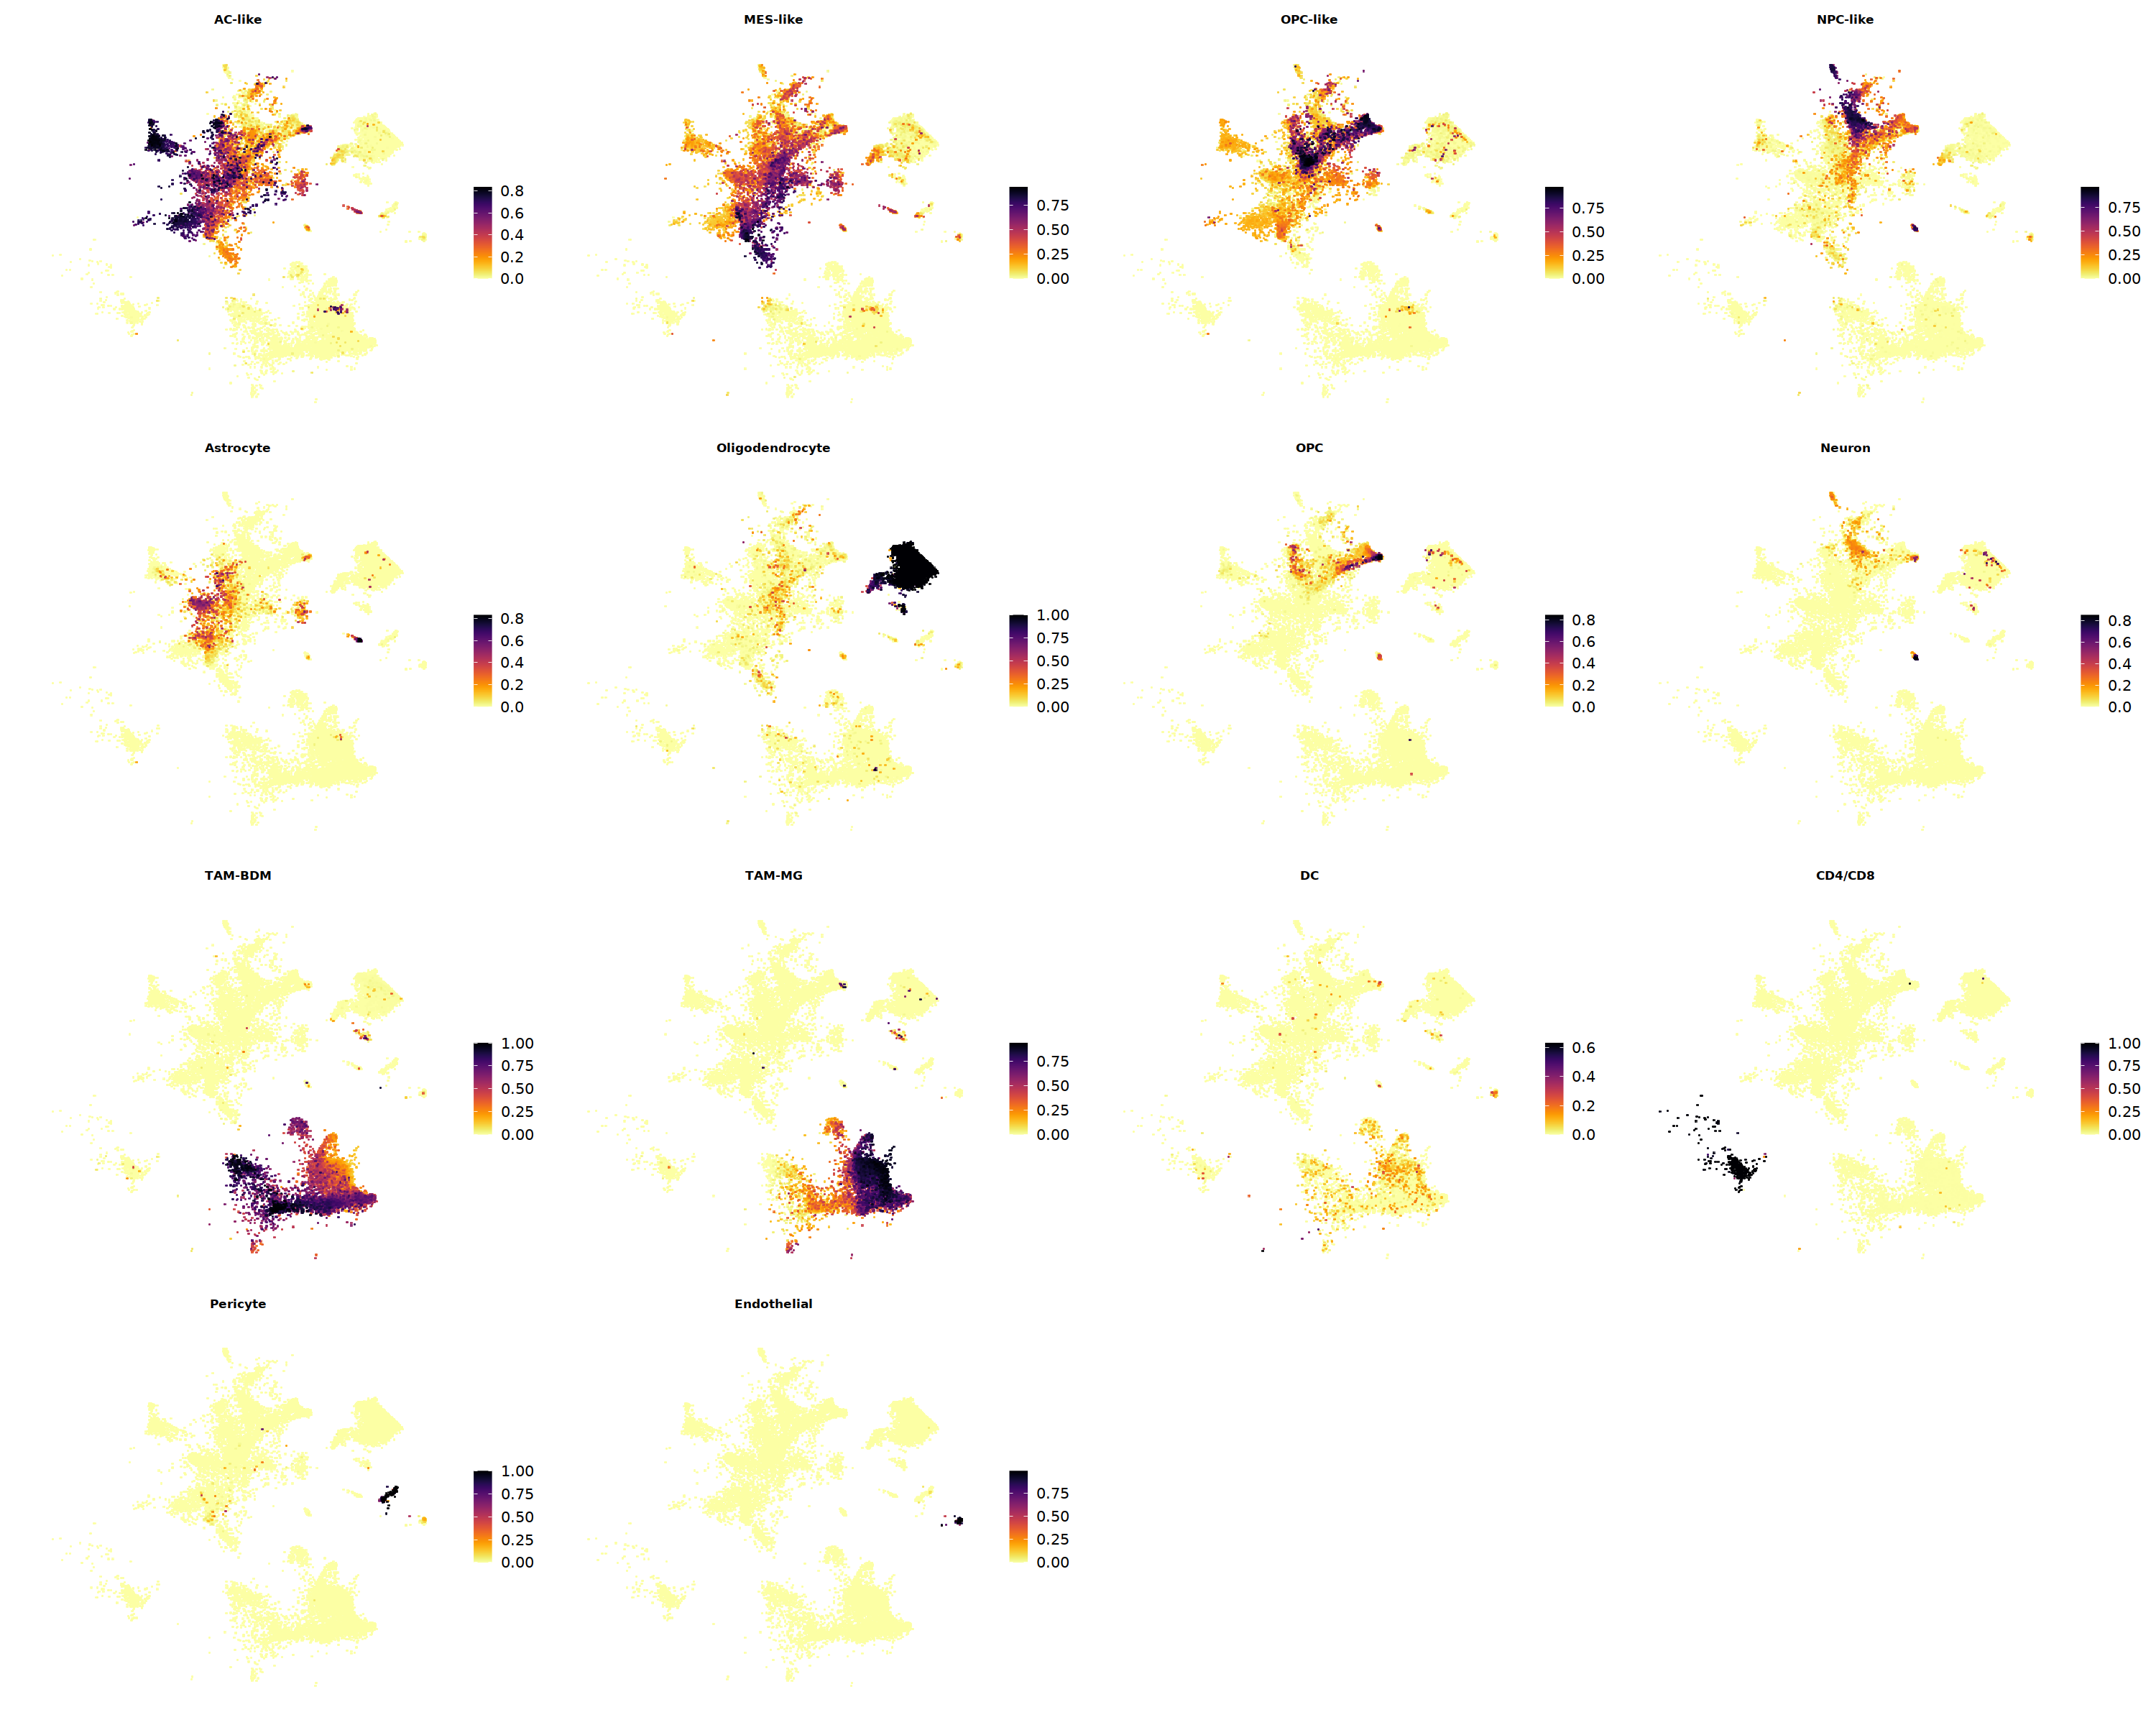

In [ ]:
DefaultAssay(gbm) <- 'prediction.score.high_hierarchy'
options(repr.plot.height = 20, repr.plot.width = 25)
FeaturePlot(gbm, features = names(table(gbm$predicted.high_hierarchy)),  
            reduction = "ref.umap", ncol = 4, order = TRUE,
           raster = TRUE) &  
  viridis::scale_colour_viridis(option = 'inferno', direction = -1) & 
theme(plot.title = element_text(size = 10)) & NoAxes()

In [ ]:
ggsave(filename = 'figures/prediction_score_Ruiz2021.pdf', width = 15, height = 12)

Plots were arranged in Illustrator 